In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

df_path = []

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        path = os.path.join(dirname, filename)
        df_path.append(path)
        print(path)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e6/sample_submission.csv
/kaggle/input/playground-series-s4e6/train.csv
/kaggle/input/playground-series-s4e6/test.csv


In [2]:
train_df = pd.read_csv(df_path[1])
train_df.head()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              76518 non-null  int64  
 1   Marital status                                  76518 non-null  int64  
 2   Application mode                                76518 non-null  int64  
 3   Application order                               76518 non-null  int64  
 4   Course                                          76518 non-null  int64  
 5   Daytime/evening attendance                      76518 non-null  int64  
 6   Previous qualification                          76518 non-null  int64  
 7   Previous qualification (grade)                  76518 non-null  float64
 8   Nacionality                                     76518 non-null  int64  
 9   Mother's qualification                 

In [4]:
train_df['Target'].value_counts()

Target
Graduate    36282
Dropout     25296
Enrolled    14940
Name: count, dtype: int64

In [5]:
train_df.isnull().sum()

id                                                0
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship 

# Data Analysis

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
train_df[['Marital status','Target']]

,Marital status,Target
0,1,Graduate
1,1,Dropout
2,1,Dropout
3,1,Enrolled
4,1,Graduate
...,...,...
76513,1,Graduate
76514,1,Graduate
76515,5,Enrolled
76516,1,Dropout


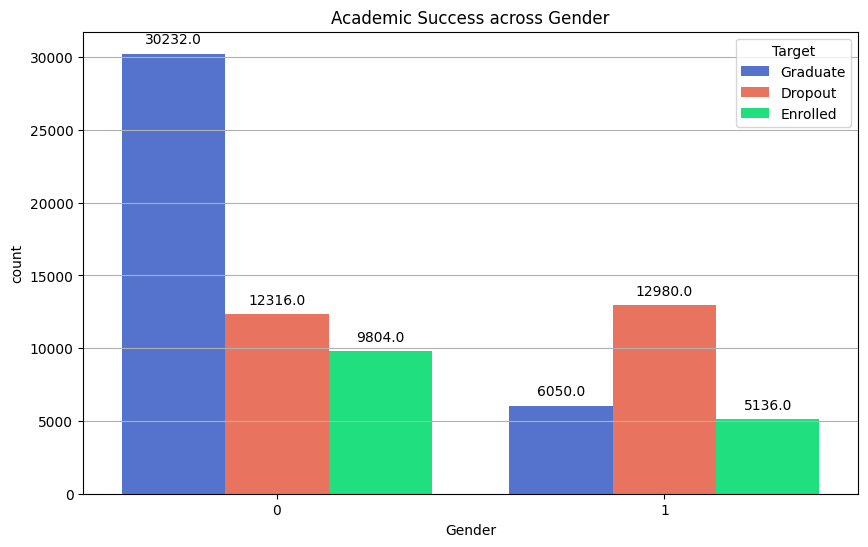

In [8]:
plt.figure(figsize=(10, 6))
plt.grid()
sns.countplot(data=train_df, x='Gender', hue='Target',palette=['royalblue','tomato','springgreen'])
plt.title("Academic Success across Gender")
# Annotate the bars
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

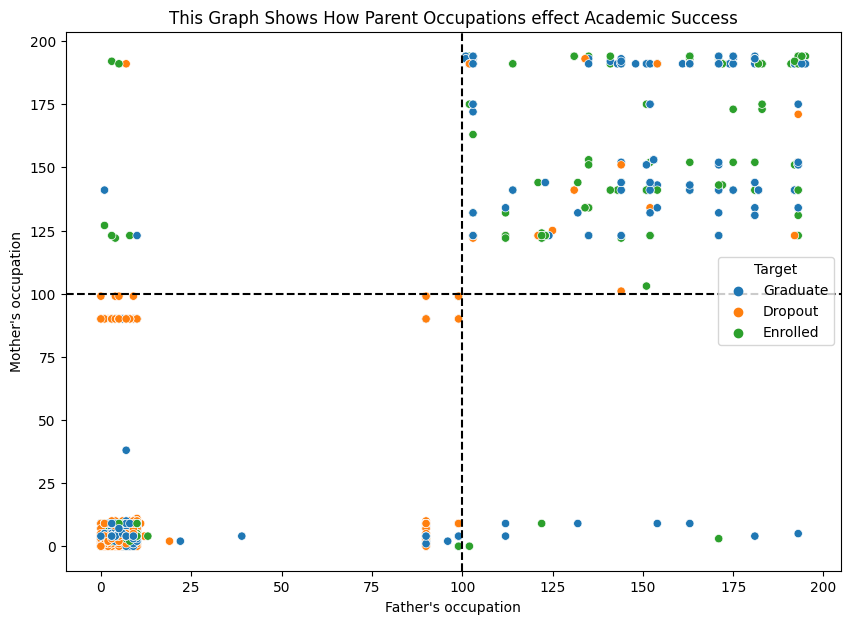

In [9]:
plt.figure(
    figsize=(10,7)
)
sns.scatterplot(
    x = train_df['Father\'s occupation'], 
    y = train_df['Mother\'s occupation'],
    hue = train_df['Target']
)
plt.title('This Graph Shows How Parent Occupations effect Academic Success')
plt.axhline(y=100, linestyle='--',color='black')
plt.axvline(x=100, linestyle='--',color='black')
plt.show()

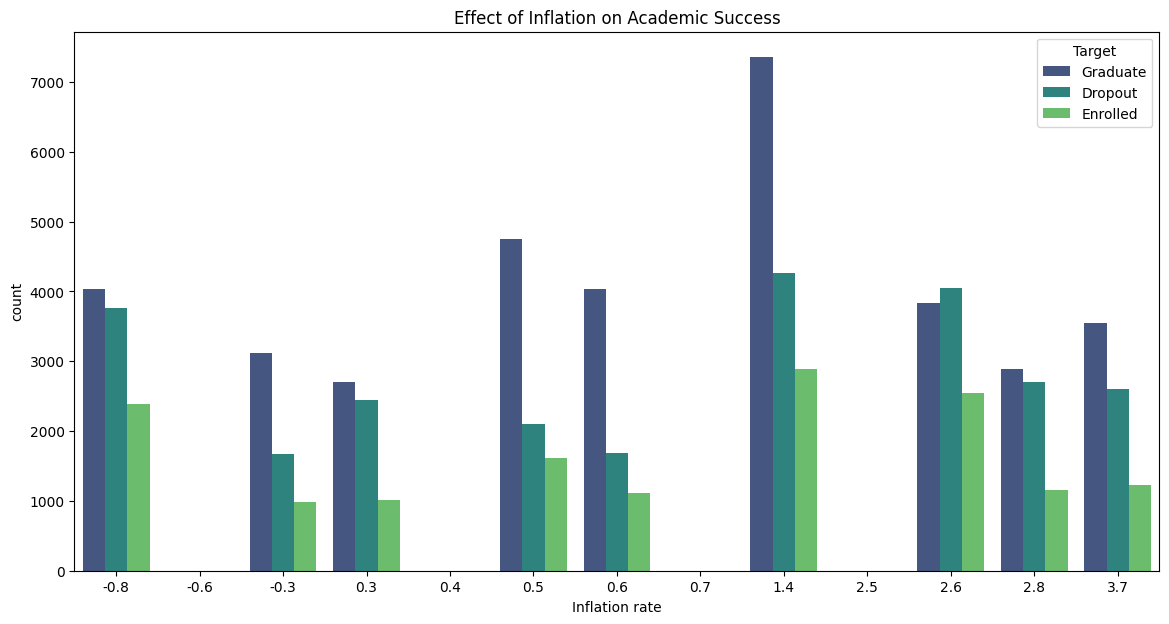

In [11]:
plt.figure(figsize=(14,7))
sns.countplot(
    x = train_df['Inflation rate'],
    hue = train_df['Target'],
    fill=True,
    palette='viridis'
)
plt.title('Effect of Inflation on Academic Success')
plt.show()

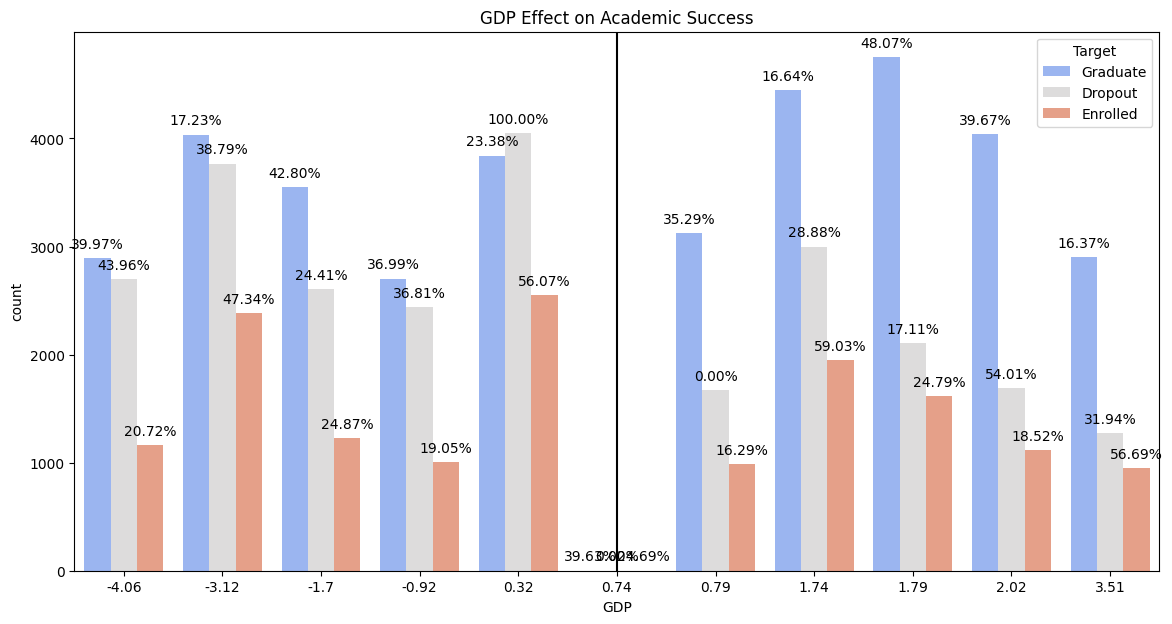

In [13]:

# Assuming train_df is already defined and contains the columns 'GDP' and 'Target'
# Creating a countplot
plt.figure(figsize=(14, 7))
sns.countplot(
    x=train_df['GDP'],
    hue=train_df['Target'],
    fill=True,
    palette='coolwarm'
)
plt.title('GDP Effect on Academic Success')
plt.axvline(x=5, linestyle='-', color='black')
ax = plt.gca()

# Calculating the percentages
total_counts = train_df.groupby(['GDP', 'Target']).size().unstack().fillna(0).values
percentages = total_counts / total_counts.sum(axis=1, keepdims=True) * 100

# Annotating the bars with percentages
for p, percentage in zip(ax.patches, percentages.flatten()):
    ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


# Feature Engineering

In [14]:
train_df.drop('id',axis=1,inplace=True)

In [15]:
x = train_df.drop('Target',axis=1)
y = train_df['Target']

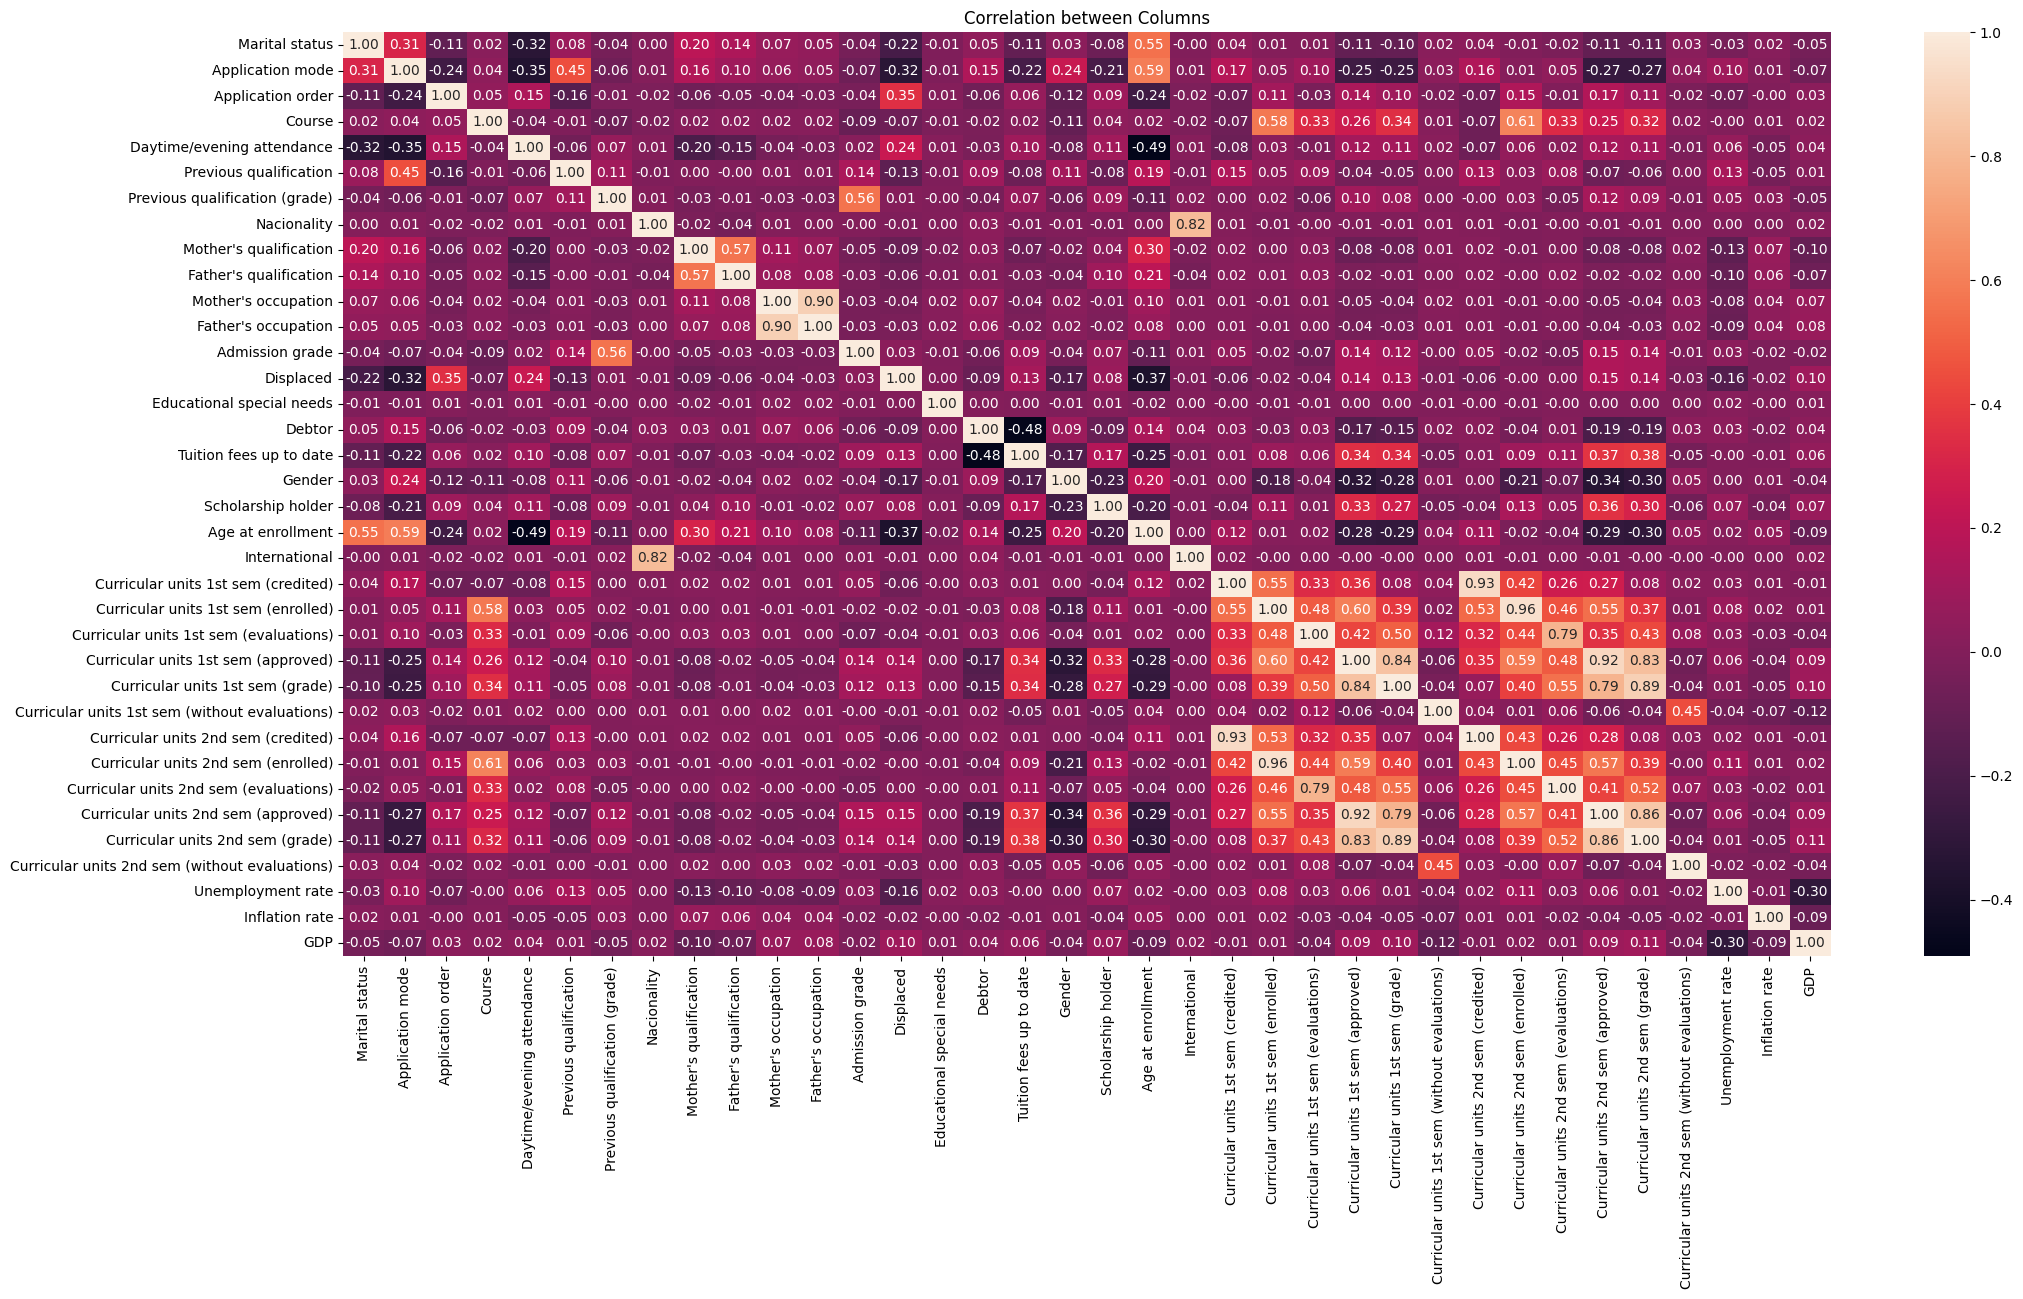

In [16]:
plt.figure(
    figsize=(24,12)
)
sns.heatmap(x.corr(), annot=True, fmt='.2f')
plt.title('Correlation between Columns')
plt.show()

# Predictive Model

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler

In [18]:
# std = StandardScaler()
# x = std.fit_transform(x)
# x[0:1]

In [19]:
le = LabelEncoder()
y = le.fit_transform(y)
y

array([2, 0, 0, ..., 1, 0, 2])

In [20]:
x_train,x_test,y_train,y_test = train_test_split(
    x,y,
    test_size=0.1
)
x_train.shape, x_test.shape

((68866, 36), (7652, 36))

In [21]:
y[0:10]

array([2, 0, 0, 1, 2, 0, 2, 2, 0, 2])

In [22]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier,ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, auc

In [23]:
def train_classification_models(x_train, y_train):
    models = {
        'RandomForest': RandomForestClassifier(),
        'GradientBoosting': GradientBoostingClassifier(),
        'XGBoost': XGBClassifier(),
        'NeuralNetwork': MLPClassifier(),
        'LGBMClassifier': LGBMClassifier(),
        'DecisionTree': ExtraTreesClassifier()
    }

    trained_models = {}
    for name, model in models.items():
        model.fit(x_train, y_train)
        trained_models[name] = model
    return trained_models

In [24]:
trained_models = train_classification_models(x_train,y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017742 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1380
[LightGBM] [Info] Number of data points in the train set: 68866, number of used features: 36
[LightGBM] [Info] Start training from score -1.110238
[LightGBM] [Info] Start training from score -1.630140
[LightGBM] [Info] Start training from score -0.745246


In [25]:
trained_models

{'RandomForest': RandomForestClassifier(),
 'GradientBoosting': GradientBoostingClassifier(),
 'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='multi:softprob', ...),
 'NeuralNetwork': MLPClassifier(),
 'LGBMClassifier': LGBMClassifier(),
 'DecisionTree': ExtraTreesClassifier()}

In [26]:
def evaluate_classification_models(x_test, y_test, trained_models):
    results = []

    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.flatten()

    for i, (name, model) in enumerate(trained_models.items()):
        y_pred = model.predict(x_test)
        score = model.score(x_test, y_test)
        cm = confusion_matrix(y_test, y_pred)

        results.append({'model_name': name, 'score': score})

        # Plotting confusion matrix as a heatmap
        sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', ax=axes[i])
        axes[i].set_title(f'{name}\nAccuracy: {score:.3f}')
        axes[i].set_xlabel('Predicted Label')
        axes[i].set_ylabel('True Label')

    plt.tight_layout()
    plt.show()

    results_df = pd.DataFrame(results)
    return results_df

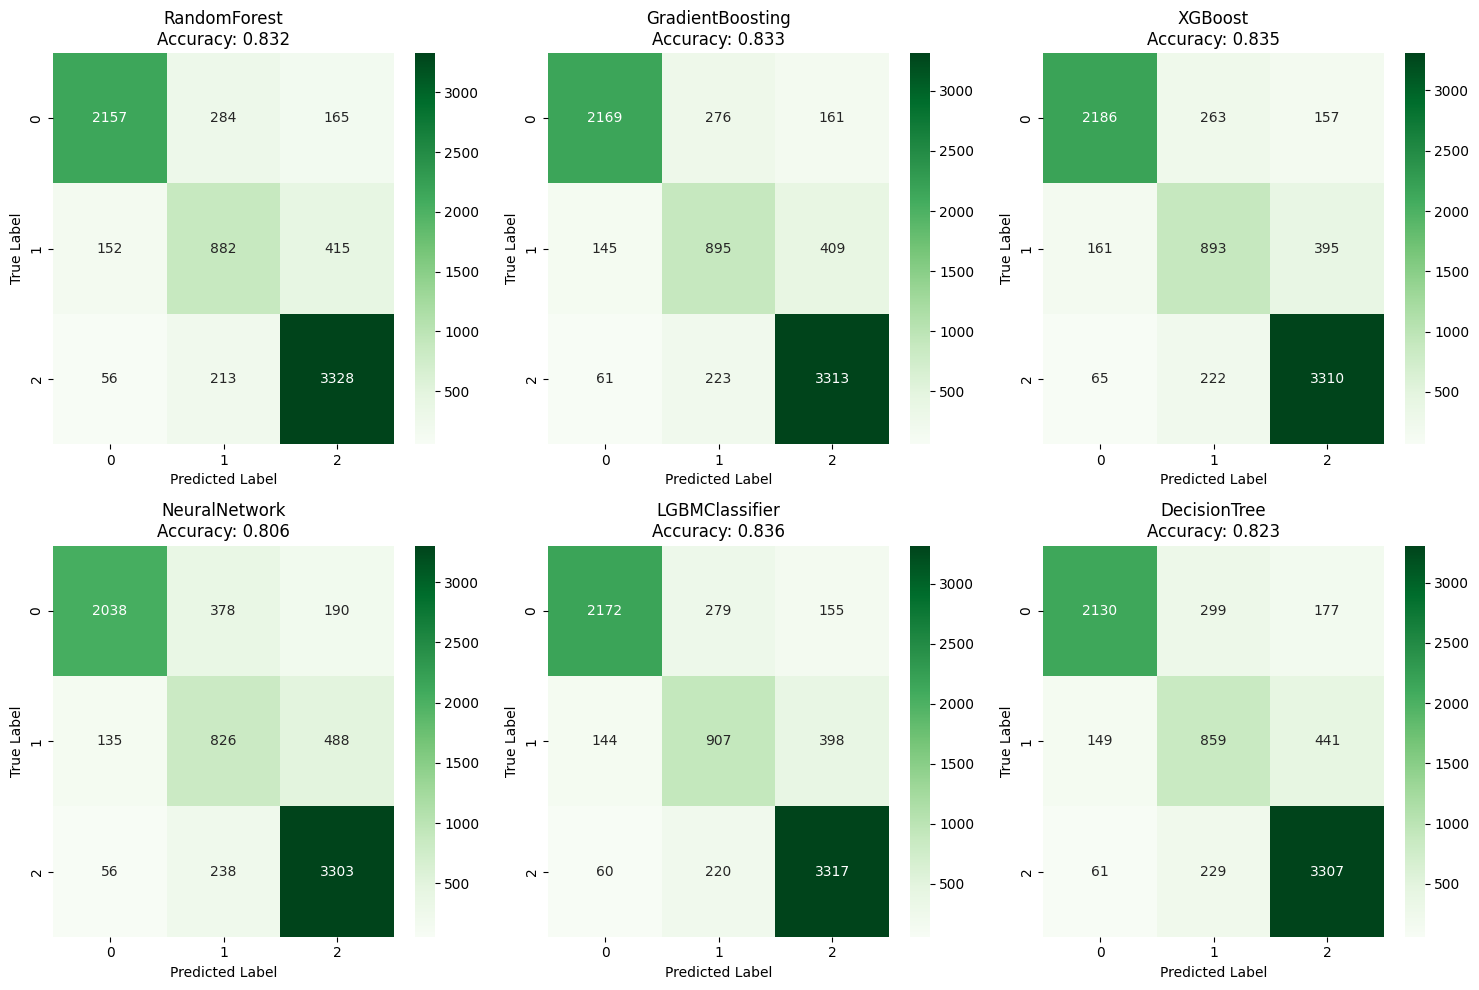

,model_name,score
0,RandomForest,0.832070
1,GradientBoosting,0.833377
2,XGBoost,0.834945
3,NeuralNetwork,0.805933
4,LGBMClassifier,0.835860
5,DecisionTree,0.822791


In [27]:
evaluate_classification_models(
    x_test,y_test,
    trained_models
)

In [28]:
trained_models['LGBMClassifier'].fit(x,y)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.029219 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1387
[LightGBM] [Info] Number of data points in the train set: 76518, number of used features: 36
[LightGBM] [Info] Start training from score -1.106880
[LightGBM] [Info] Start training from score -1.633484
[LightGBM] [Info] Start training from score -0.746204


LGBMClassifier()

In [29]:
test_df = pd.read_csv(df_path[2])
test_id = test_df['id']
test_df.drop('id',axis=1,inplace=True)
test_df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,1,1,9500,1,1,141.0,1,3,1,...,0,0,8,0,0,0.000000,0,13.9,-0.3,0.79
1,1,1,1,9238,1,1,128.0,1,1,19,...,0,0,6,6,6,13.500000,0,11.1,0.6,2.02
2,1,1,1,9238,1,1,118.0,1,1,19,...,0,0,6,11,5,11.000000,0,15.5,2.8,-4.06
3,1,44,1,9147,1,39,130.0,1,1,19,...,0,3,8,14,5,11.000000,0,8.9,1.4,3.51
4,1,39,1,9670,1,1,110.0,1,1,37,...,0,0,6,9,4,10.666667,2,7.6,2.6,0.32


In [66]:
# test_data = std.fit_transform(test_df)
# test_data[0:1]

In [30]:
test_pred = trained_models['XGBoost'].predict(test_df)

In [31]:
pred_target = le.inverse_transform(test_pred)
pred_target

array(['Dropout', 'Graduate', 'Graduate', ..., 'Dropout', 'Dropout',
       'Dropout'], dtype=object)

In [32]:
sub_dict = {
    "id":test_id,
    "Target":pred_target
}

In [33]:
submission = pd.DataFrame(sub_dict)
submission.head()

,id,Target
0,76518,Dropout
1,76519,Graduate
2,76520,Graduate
3,76521,Graduate
4,76522,Enrolled


In [34]:
submission.to_csv('submission.csv',index=False)